In [20]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [21]:
path = 'C:\\Users\\Admin\\Desktop\\Project\\seg_train\\seg_train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [22]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 6)
Image Size of first image :  (227, 227, 3)
Output of first image :  (6,)


Text(0.5, 1.0, '[0. 0. 0. 1. 0. 0.]')

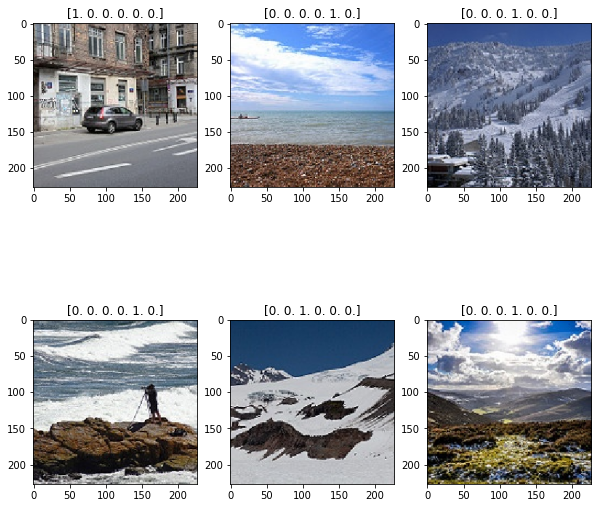

In [23]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [24]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(6,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [25]:
alex = AlexNet(train[0][0].shape[1:])

In [26]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation_5 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [27]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])


In [30]:
alex.fit(train,epochs=25)

Epoch 1/25
439/439 [==============================] - 573s 1s/step - loss: 1.2005 - accuracy: 0.5203
Epoch 2/25
439/439 [==============================] - 563s 1s/step - loss: 0.8602 - accuracy: 0.6789
Epoch 3/25
439/439 [==============================] - 562s 1s/step - loss: 0.7098 - accuracy: 0.7445
Epoch 4/25
439/439 [==============================] - 564s 1s/step - loss: 0.6221 - accuracy: 0.7809
Epoch 5/25
439/439 [==============================] - 555s 1s/step - loss: 0.5534 - accuracy: 0.8078
Epoch 6/25
439/439 [==============================] - 550s 1s/step - loss: 0.5324 - accuracy: 0.8121
Epoch 7/25
439/439 [==============================] - 567s 1s/step - loss: 0.4956 - accuracy: 0.8299
Epoch 8/25
439/439 [==============================] - 549s 1s/step - loss: 0.4824 - accuracy: 0.8327
Epoch 9/25
439/439 [==============================] - 546s 1s/step - loss: 0.4419 - accuracy: 0.8488
Epoch 10/25
439/439 [==============================] - 549s 1s/step - loss: 0.4245 - accura

In [31]:
path_test = 'C:\\Users\\Admin\\Desktop\\Project\\seg_test\\seg_test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [32]:
preds = alex.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

94/94 [==============================] - 21s 223ms/step - loss: 2.4716 - accuracy: 0.5117
Loss = 2.471639394760132
Test Accuracy = 0.5116666555404663


In [45]:
path_test = 'C:\\Users\\Admin\\Desktop\\Project\\seg_pred'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 7301 images belonging to 1 classes.


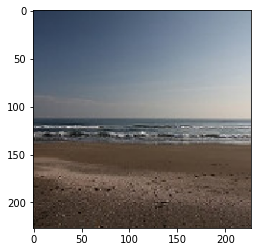

In [35]:
predictions = alex.predict(predict)
imshow(predict[700][0][0])

In [36]:
print(predictions[700])

[3.3240786e-04 3.3785560e-05 1.6768547e-02 9.8283201e-01 3.3074153e-05
 2.5852336e-07]


In [42]:
import os 
import sys
def get_category(predicted_output):
    path ="C:\\Users\\Admin\\Desktop\\Project\\seg_train\\seg_train"
    return os.listdir(path)[np.argmax(predicted_output)]

In [43]:
print(get_category(predictions[700])) #this just shows the function implementation

mountain


Text(0.5, 1.0, 'mountain')

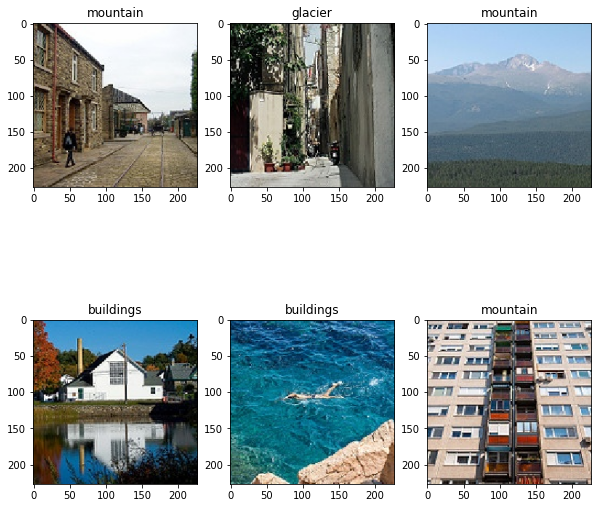

In [44]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(predict[1012][0][0])
axs[0][0].set_title(get_category(predictions[1012]))
axs[0][1].imshow(predict[22][0][0])
axs[0][1].set_title(get_category(predictions[22]))
axs[0][2].imshow(predict[1400][0][0])
axs[0][2].set_title(get_category(predictions[1400]))
axs[1][0].imshow(predict[3200][0][0])
axs[1][0].set_title(get_category(predictions[3200]))
axs[1][1].imshow(predict[6000][0][0])
axs[1][1].set_title(get_category(predictions[6000]))
axs[1][2].imshow(predict[938][0][0])
axs[1][2].set_title(get_category(predictions[938]))